In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
import cv2 as cv
img = plt.imread('C:/Users/jihun/4255/OpensourceHW/pkl_result/train/specto_window_400/normal/S2_535png.png')
print(img.shape)



(308, 310, 4)


### 각 window의 정확도 비교

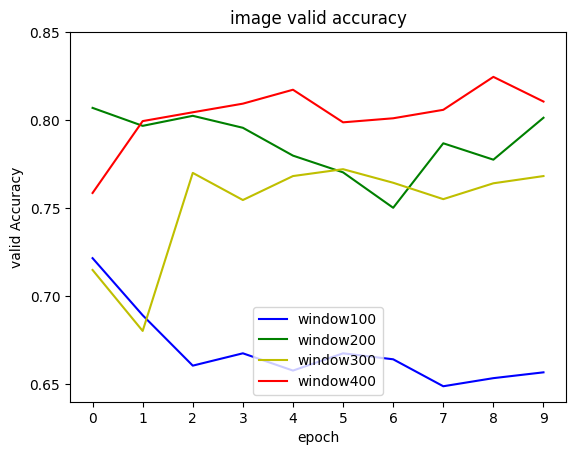

In [148]:
window_100_model = [0.7217, 0.6893, 0.6607, 0.6677, 0.6579, 0.6677, 0.6643, 0.6490, 0.6536, 0.6569]
window_200_model = [0.8070, 0.7968, 0.8025, 0.7957, 0.7799, 0.7704, 0.7503, 0.7869, 0.7776, 0.8014]
window_300_model = [0.7150, 0.6804, 0.7701, 0.7547, 0.7683, 0.7722, 0.7645, 0.7552, 0.7642, 0.7683]
window_400_model = [0.7587, 0.7995, 0.8045, 0.8094, 0.8173, 0.7988, 0.8011, 0.8059, 0.8246, 0.8106]
x_axis = np.arange(0,10)
plt.plot(x_axis, window_100_model, 'b', label='window100')
plt.plot(x_axis, window_200_model, 'g', label='window200')
plt.plot(x_axis, window_300_model, 'y', label='window300')
plt.plot(x_axis, window_400_model, 'r', label='window400')
plt.legend(); plt.xlabel('epoch'); plt.ylabel('valid Accuracy'); plt.title('image valid accuracy')
plt.xticks([0,1,2,3,4,5,6,7,8,9]); plt.yticks([0.65,0.70,0.75,0.80,0.85])
plt.show()

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/jihun/4255/OpensourceHW/pkl_result/train/window_400',
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    'C:/Users/jihun/4255/OpensourceHW/pkl_result/train/window_400',
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=0
)

Found 40186 images belonging to 2 classes.
Found 4464 images belonging to 2 classes.


In [4]:
model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(300,300,3)),
    tf.keras.layers.Conv2D(32, 3, activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, 3, activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 341056)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 682114    
Total params: 701,506
Trainable params: 701,506
Non-trainable params: 0
__________________________________________________

In [6]:
model1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [7]:
history = model1.fit(train_generator, epochs=10, verbose=1, validation_data=validation_generator)

Epoch 1/10
2512/2512 [==============================] - 103s 37ms/step - loss: 0.1621 - accuracy: 0.9378 - val_loss: 0.7279 - val_accuracy: 0.7744
Epoch 2/10
2512/2512 [==============================] - 89s 36ms/step - loss: 0.0831 - accuracy: 0.9722 - val_loss: 0.4821 - val_accuracy: 0.8114
Epoch 3/10
2512/2512 [==============================] - 79s 31ms/step - loss: 0.0558 - accuracy: 0.9822 - val_loss: 0.6668 - val_accuracy: 0.7720
Epoch 4/10
2512/2512 [==============================] - 77s 31ms/step - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0.7590 - val_accuracy: 0.7977
Epoch 5/10
2512/2512 [==============================] - 79s 31ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.7184 - val_accuracy: 0.8138
Epoch 6/10
2512/2512 [==============================] - 79s 31ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.9433 - val_accuracy: 0.8118
Epoch 7/10
2512/2512 [==============================] - 79s 31ms/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 1.1126 

In [8]:
model1.save('C:/Users/jihun/4255/OpensourceHW/model/raw_signal_model.h5')

In [22]:
model1.val_accuracy

AttributeError: 'Sequential' object has no attribute 'val_accuracy'

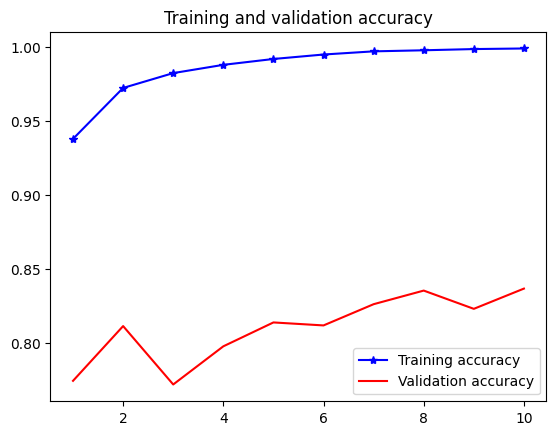

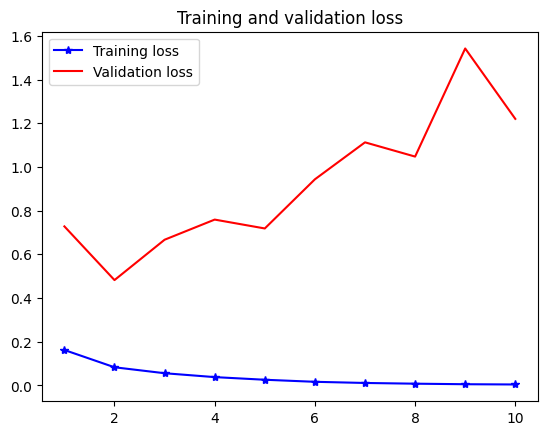

In [9]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'b*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
model1 = tf.keras.models.load_model('C:/Users/jihun/4255/OpensourceHW/model/raw_signal_model.h5')

In [58]:
# 이미지 경로 설정
test_data_dir = 'C:/Users/jihun/4255/OpensourceHW/pkl_result/test'

# 이미지 데이터 전처리
test_data_generator = ImageDataGenerator(rescale=1./255)  # 이미지 정규화
test_data = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(300, 300),  # 이미지 크기 조정
    batch_size=16,
    class_mode='categorical',
)
# 테스트 데이터 예측
predictions = model1.predict(test_data)

class_labels= test_data.class_indices
print(class_labels)

y_true = test_data.labels
y_pred = predictions > 0.5

threshold = 0.5
y_pred = np.where(y_pred[:,1] >= threshold, 1,0)
print(y_pred)

metric = tf.keras.metrics.BinaryAccuracy()
accuracy = metric(y_true, y_pred)
print(accuracy)

Found 2600 images belonging to 2 classes.
{'normal': 0, 'stress': 1}
[0 0 1 ... 0 1 0]
tf.Tensor(0.50769234, shape=(), dtype=float32)


Confusion Matrix:
tf.Tensor(
[[654 646]
 [634 666]], shape=(2, 2), dtype=int32)


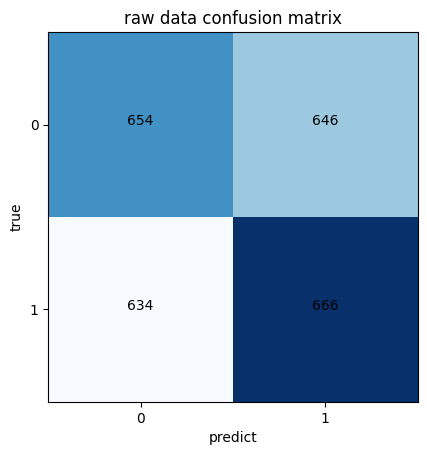

In [59]:
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

confusion_matrix = np.array(confusion_matrix)

# 혼동 행렬을 그립니다.
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('raw data confusion matrix')
plt.xlabel('predict')
plt.ylabel('true')

# 혼동 행렬의 각 셀에 레이블을 추가합니다.
thresh = confusion_matrix.max() / 2.0
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="black" if confusion_matrix[i, j] > thresh else "black")

# x축과 y축에 0과 1을 표시합니다.
plt.xticks([0, 1])
plt.yticks([0, 1])

plt.show()


In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    'C:/Users/jihun/4255/OpensourceHW/pkl_result/train/specto_window_400',
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    'C:/Users/jihun/4255/OpensourceHW/pkl_result/train/specto_window_400',
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=0
)

Found 18269 images belonging to 2 classes.
Found 2028 images belonging to 2 classes.


In [5]:
model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(300,300,3)),
    tf.keras.layers.Conv2D(32, 3, activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, 3, activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 341056)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 682114    
Total params: 701,506
Trainable params: 701,506
Non-trainable params: 0
________________________________________________

In [6]:
model2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [7]:
history = model2.fit(train_generator, epochs=10, verbose=1, validation_data=validation_generator)

Epoch 1/10
1142/1142 [==============================] - 60s 48ms/step - loss: 0.2549 - accuracy: 0.9027 - val_loss: 0.2787 - val_accuracy: 0.8950
Epoch 2/10
1142/1142 [==============================] - 53s 46ms/step - loss: 0.1336 - accuracy: 0.9560 - val_loss: 0.1948 - val_accuracy: 0.9418
Epoch 3/10
1142/1142 [==============================] - 47s 41ms/step - loss: 0.1032 - accuracy: 0.9647 - val_loss: 0.2778 - val_accuracy: 0.9122
Epoch 4/10
1142/1142 [==============================] - 48s 42ms/step - loss: 0.0744 - accuracy: 0.9755 - val_loss: 0.2609 - val_accuracy: 0.9191
Epoch 5/10
1142/1142 [==============================] - 46s 40ms/step - loss: 0.0595 - accuracy: 0.9803 - val_loss: 0.2411 - val_accuracy: 0.9354
Epoch 6/10
1142/1142 [==============================] - 47s 41ms/step - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.2478 - val_accuracy: 0.9334
Epoch 7/10
1142/1142 [==============================] - 46s 40ms/step - loss: 0.0361 - accuracy: 0.9892 - val_loss: 0.2813 -

In [14]:
model2.save('C:/Users/jihun/4255/OpensourceHW/model/spc_signal_model.h5')

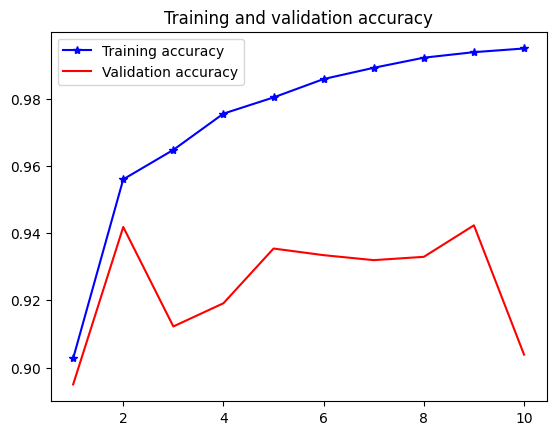

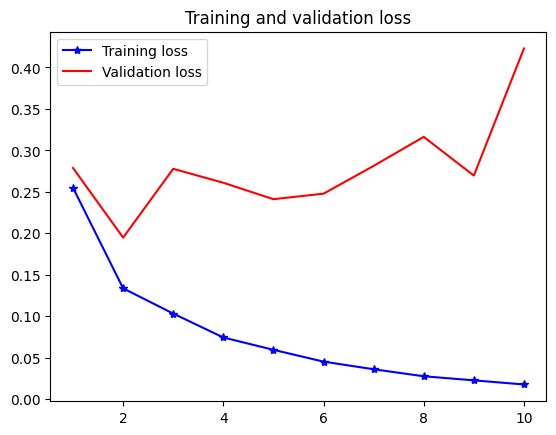

In [8]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'b*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [51]:
# 이미지 경로 설정
test_data_dir = 'C:/Users/jihun/4255/OpensourceHW/pkl_result/test'

# 이미지 데이터 전처리
test_data_generator = ImageDataGenerator(rescale=1./255)  # 이미지 정규화
test_data = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(300, 300),  # 이미지 크기 조정
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)
# 테스트 데이터 예측
predictions = model2.predict(test_data)

class_labels= test_data.class_indices
print(class_labels)

y_true = test_data.labels
y_pred = predictions > 0.5

threshold = 0.5
y_pred = np.where(y_pred[:,1] >= threshold, 1,0)
print(y_pred)

metric = tf.keras.metrics.BinaryAccuracy()
accuracy = metric(y_true, y_pred)
print(accuracy)

Found 2600 images belonging to 2 classes.
{'normal': 0, 'stress': 1}
[1 1 1 ... 1 1 1]
tf.Tensor(0.5, shape=(), dtype=float32)


In [44]:
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
tf.Tensor(
[[   0 1300]
 [   0 1300]], shape=(2, 2), dtype=int32)


Confusion Matrix:
tf.Tensor(
[[   0 1300]
 [   0 1300]], shape=(2, 2), dtype=int32)


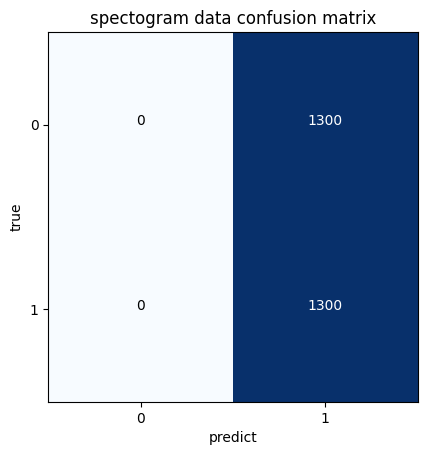

In [55]:
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

confusion_matrix = np.array(confusion_matrix)

# 혼동 행렬을 그립니다.
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('spectogram data confusion matrix')
plt.xlabel('predict')
plt.ylabel('true')

# 혼동 행렬의 각 셀에 레이블을 추가합니다.
thresh = confusion_matrix.max() / 2.0
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")

# x축과 y축에 0과 1을 표시합니다.
plt.xticks([0, 1])
plt.yticks([0, 1])

plt.show()


Text(0.5, 1.0, 'Valid Accuracy')

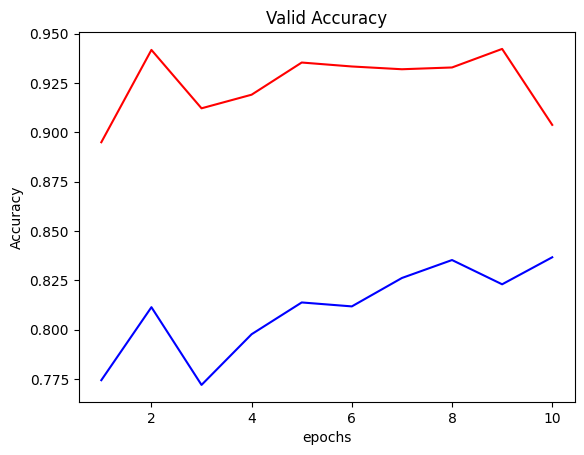

In [28]:
a = [0.7744,0.8114,0.7720,0.7977,0.8138,0.8118,0.8262,0.8353,0.8230,0.8367]
b = [0.8950,0.9418,0.9122,0.9191,0.9354,0.9334,0.9320,0.9329,0.9423,0.9038]

plt.plot(np.arange(1,11), a, 'b', label='raw')
plt.plot(np.arange(1,11), b, 'r', label='spctrogram')
plt.xlabel('epochs'); plt.ylabel('Accuracy'); plt.title('Valid Accuracy')

### 100개 테스트

Found 100 images belonging to 2 classes.


{'normal': 0, 'stress': 1}
[1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0
 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0]
tf.Tensor(0.54, shape=(), dtype=float32)


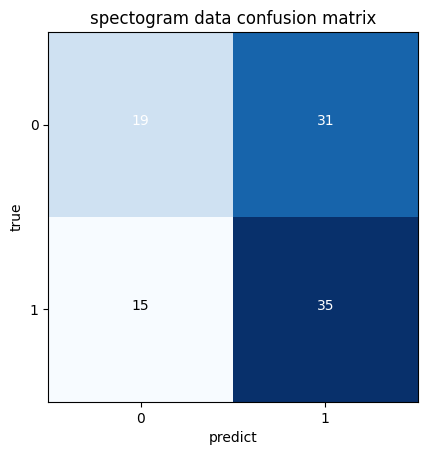

{'normal': 0, 'stress': 1}
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
tf.Tensor(0.5, shape=(), dtype=float32)


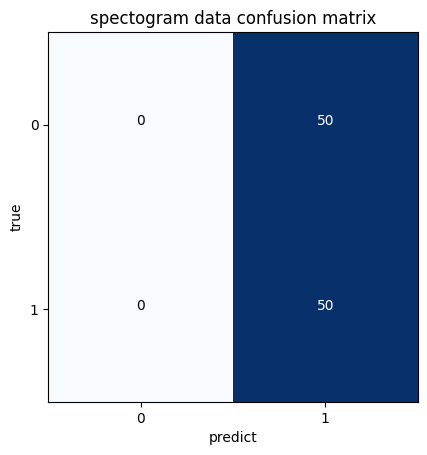

In [323]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [333]:
train_generator = zip(train_generator_input1, train_generator_input2)
vlid_generator = zip(validation_generator_input1,validation_generator_input2)
history = model.fit([train_generator_input1,
                              train_generator_input2], epochs=10, validation_data = ([validation_generator_input1,
                                                                                            validation_generator_input2]))

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'keras.preprocessing.image.DirectoryIterator'>"}), <class 'NoneType'>

In [324]:
x_train1, y_train1 = np.array(x_train_input1),np.array(y_train_input1)
x_valid1, y_valid1 = np.array(x_val_input1), np.array(y_val_input1)
x_train2, y_train2 = np.array(x_train_input2),np.array(y_train_input2)
x_valid2, y_valid2 = np.array(x_val_input2), np.array(y_val_input2)

history = model.fit([x_train1, x_train2], [y_train1,y_train2],
                    validation_data=([x_valid1, x_valid2], [y_valid1,y_valid2]),
                    epochs=10, batch_size=16)

Epoch 1/10


AttributeError: in user code:

    C:\Anaconda3\envs\ecg\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Anaconda3\envs\ecg\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Anaconda3\envs\ecg\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Anaconda3\envs\ecg\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Anaconda3\envs\ecg\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Anaconda3\envs\ecg\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Anaconda3\envs\ecg\lib\site-packages\keras\engine\training.py:792 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    C:\Anaconda3\envs\ecg\lib\site-packages\keras\engine\compile_utils.py:436 update_state
        self.build(y_pred, y_true)
    C:\Anaconda3\envs\ecg\lib\site-packages\keras\engine\compile_utils.py:359 build
        self._metrics, y_true, y_pred)
    C:\Anaconda3\envs\ecg\lib\site-packages\tensorflow\python\util\nest.py:1380 map_structure_up_to
        **kwargs)
    C:\Anaconda3\envs\ecg\lib\site-packages\tensorflow\python\util\nest.py:1475 map_structure_with_tuple_paths_up_to
        func(*args, **kwargs) for args in zip(flat_path_gen, *flat_value_gen)
    C:\Anaconda3\envs\ecg\lib\site-packages\tensorflow\python\util\nest.py:1475 <listcomp>
        func(*args, **kwargs) for args in zip(flat_path_gen, *flat_value_gen)
    C:\Anaconda3\envs\ecg\lib\site-packages\tensorflow\python\util\nest.py:1378 <lambda>
        lambda _, *values: func(*values),  # Discards the path arg.
    C:\Anaconda3\envs\ecg\lib\site-packages\keras\engine\compile_utils.py:482 _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    C:\Anaconda3\envs\ecg\lib\site-packages\keras\engine\compile_utils.py:482 <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    C:\Anaconda3\envs\ecg\lib\site-packages\keras\engine\compile_utils.py:503 _get_metric_object
        y_t_rank = len(y_t.shape.as_list())

    AttributeError: 'tuple' object has no attribute 'shape'


In [336]:
# Train data generation
train_generator_input1 = train_datagen.flow_from_directory(
    'C:/Users/jihun/4255/OpensourceHW/pkl_result/train/window_400',
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

train_generator_input2 = train_datagen.flow_from_directory(
    'C:/Users/jihun/4255/OpensourceHW/pkl_result/train/specto_window_400',
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

# Validation data generation
validation_generator_input1 = test_datagen.flow_from_directory(
    'C:/Users/jihun/4255/OpensourceHW/pkl_result/train/window_400',
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

validation_generator_input2 = test_datagen.flow_from_directory(
    'C:/Users/jihun/4255/OpensourceHW/pkl_result/train/specto_window_400',
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

# Generate numpy arrays for train and validation data
x_train1, y_train1 = next(train_generator_input1)
x_train2, y_train2 = next(train_generator_input2)

x_valid1, y_valid1 = next(validation_generator_input1)
x_valid2, y_valid2 = next(validation_generator_input2)

# Model definition
input1 = tf.keras.Input(shape=(300, 300, 3))
conv1_1 = tf.keras.layers.Conv2D(32, 3, activation='relu')(input1)
pool1 = tf.keras.layers.MaxPooling2D(2, 2)(conv1_1)
conv1_2 = tf.keras.layers.Conv2D(64, 3, activation='relu')(pool1)
pool2 = tf.keras.layers.MaxPooling2D(2, 2)(conv1_2)
flatten1 = tf.keras.layers.Flatten()(pool2)

input2 = tf.keras.Input(shape=(300, 300, 3))
conv2_1 = tf.keras.layers.Conv2D(32, 3, activation='relu')(input2)
pool3 = tf.keras.layers.MaxPooling2D(2, 2)(conv2_1)
conv2_2 = tf.keras.layers.Conv2D(64, 3, activation='relu')(pool3)
pool4 = tf.keras.layers.MaxPooling2D(2, 2)(conv2_2)
flatten2 = tf.keras.layers.Flatten()(pool4)

concatenated = tf.keras.layers.concatenate([flatten1, flatten2])

fc = tf.keras.layers.Dense(2, activation='softmax')(concatenated)

model = tf.keras.Model(inputs=[input1, input2], outputs=fc)

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

history = model.fit([x_train1, x_train2], y_train1,
                    validation_data=([x_valid1, x_valid2], y_valid1),
                    epochs=100,
                    batch_size=16)


Found 35926 images belonging to 2 classes.
Found 35926 images belonging to 2 classes.
Found 3990 images belonging to 2 classes.
Found 3990 images belonging to 2 classes.
Model: "model_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_57 (InputLayer)           [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
input_58 (InputLayer)           [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
conv2d_109 (Conv2D)             (None, 298, 298, 32) 896         input_57[0][0]                   
__________________________________________________________________________________________________
conv2d_111 (Conv2D) 

1/1 [==============================] - 0s 81ms/step - loss: 0.0607 - accuracy: 1.0000 - val_loss: 2.1093 - val_accuracy: 0.3750
Epoch 35/100
1/1 [==============================] - 0s 89ms/step - loss: 0.0526 - accuracy: 1.0000 - val_loss: 2.0007 - val_accuracy: 0.3750
Epoch 36/100
1/1 [==============================] - 0s 90ms/step - loss: 0.0429 - accuracy: 1.0000 - val_loss: 1.8498 - val_accuracy: 0.4375
Epoch 37/100
1/1 [==============================] - 0s 92ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 1.7177 - val_accuracy: 0.5000
Epoch 38/100
1/1 [==============================] - 0s 93ms/step - loss: 0.0334 - accuracy: 1.0000 - val_loss: 1.6452 - val_accuracy: 0.5000
Epoch 39/100
1/1 [==============================] - 0s 90ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 1.6507 - val_accuracy: 0.5000
Epoch 40/100
1/1 [==============================] - 0s 94ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 1.7327 - val_accuracy: 0.5000
Epoch 41/100
1/1 [========

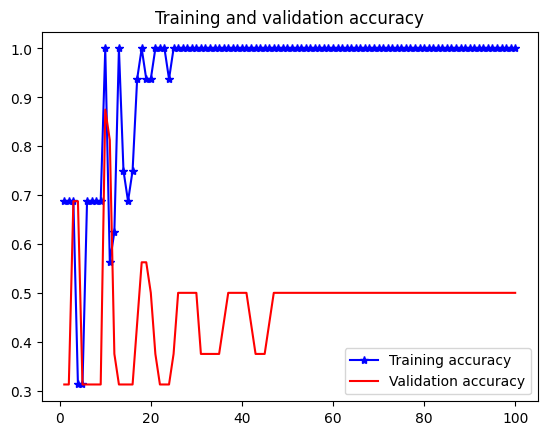

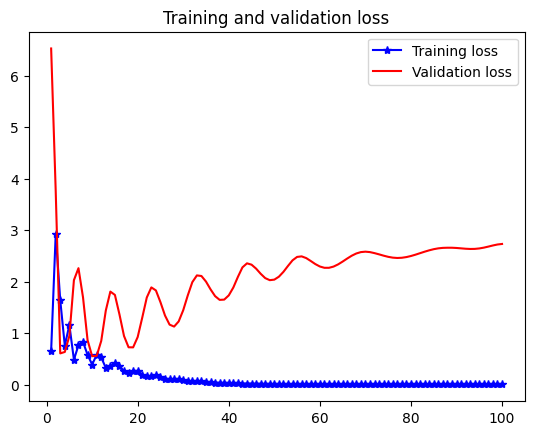

In [337]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'b*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

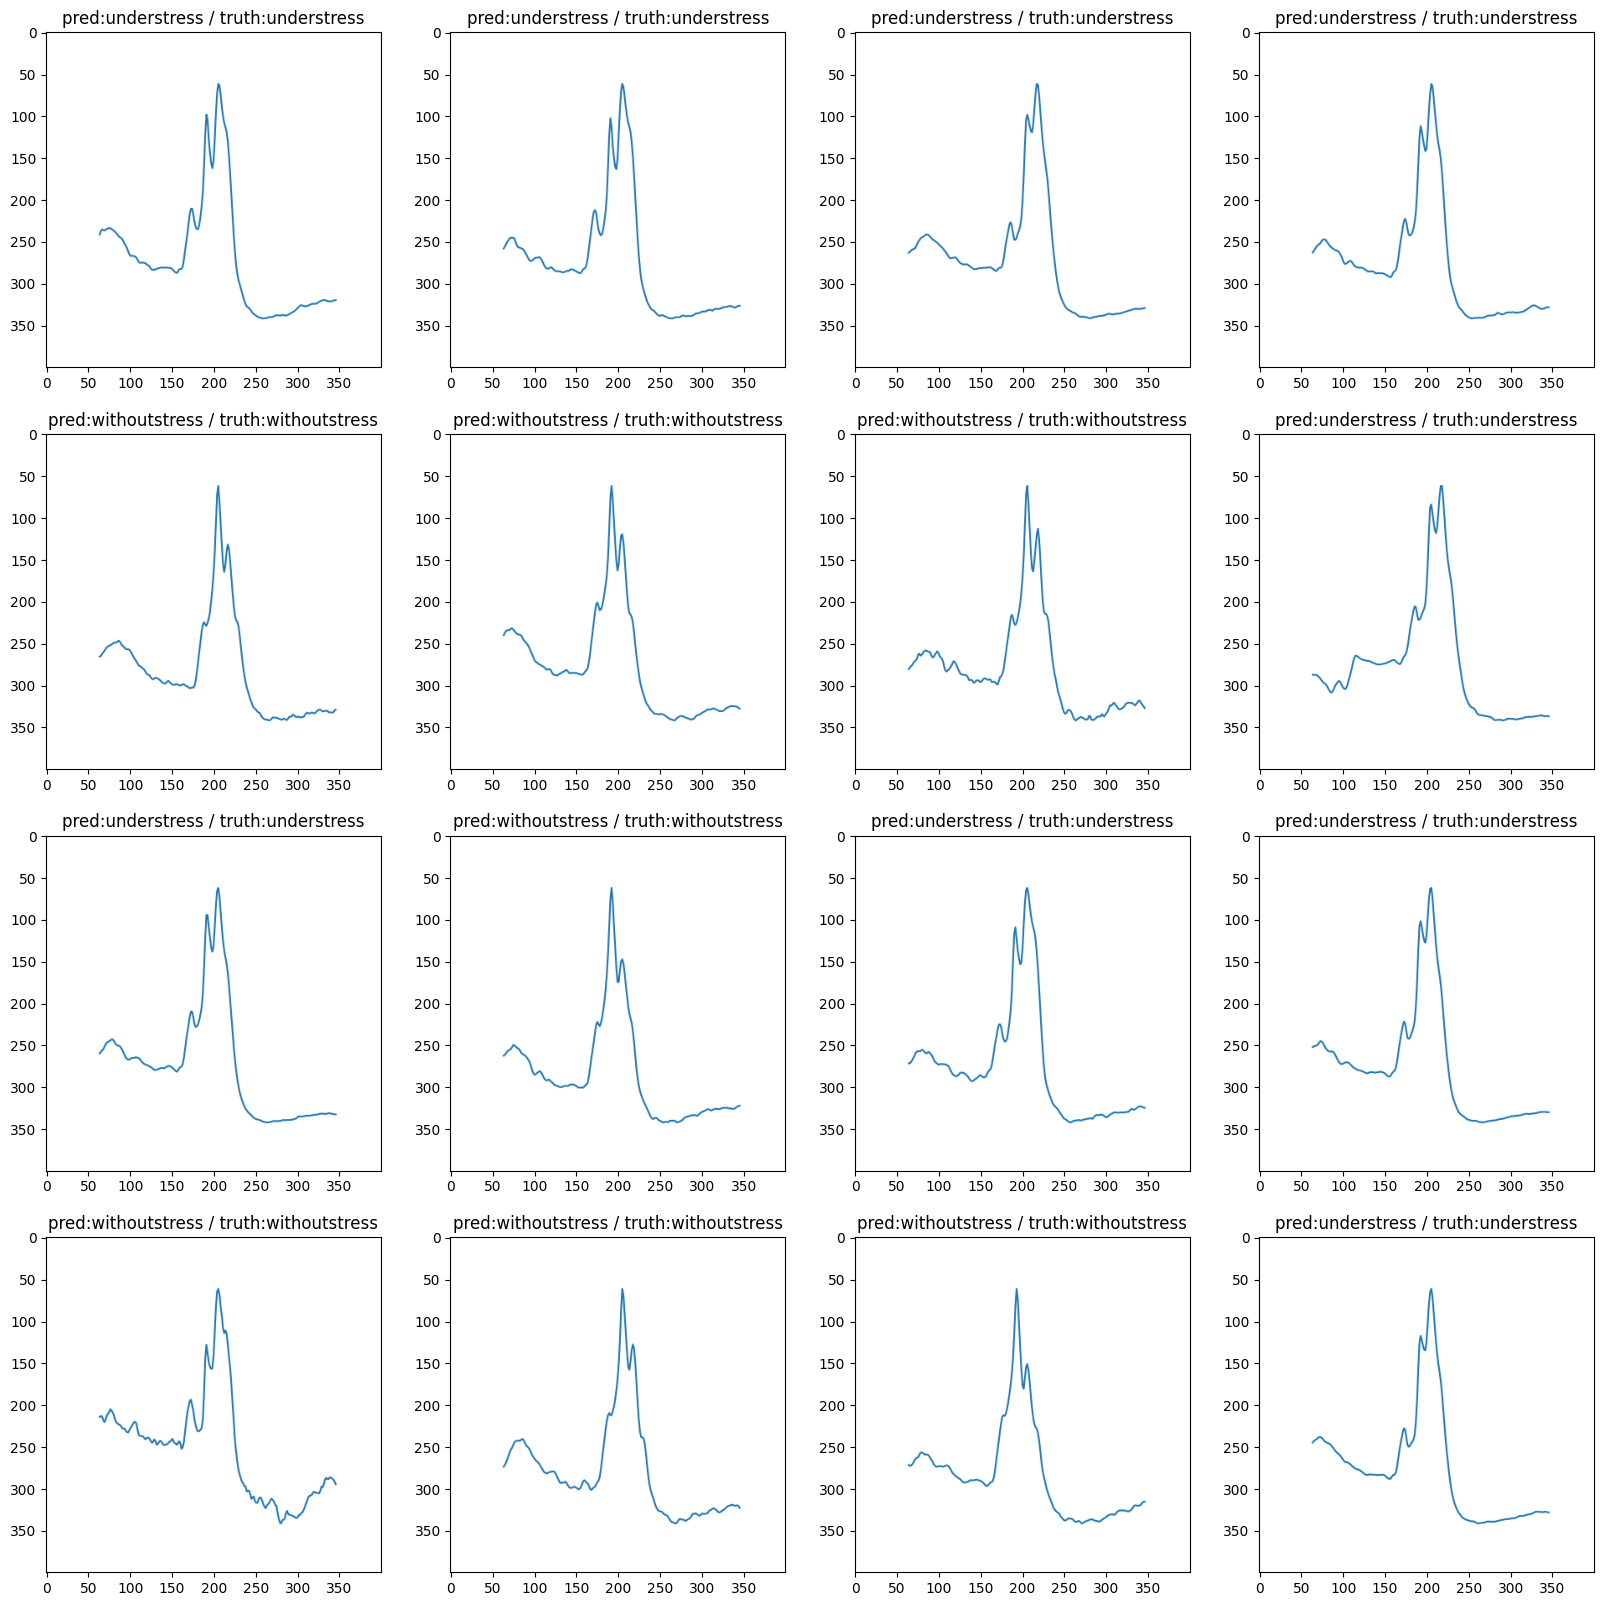

In [19]:
test_x, test_y = validation_generator.__getitem__(1)
preds = model.predict(test_x)
labels =['understress', 'withoutstress']
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

In [57]:
# 이미지 경로 설정
test_data_dir = 'C:/Users/jihun/4255/OpensourceHW/pkl_result/test'

# 이미지 데이터 전처리
test_data_generator = ImageDataGenerator(rescale=1./255)  # 이미지 정규화
test_data = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(400, 500),  # 이미지 크기 조정
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)
# 테스트 데이터 예측
predictions = model.predict(test_data)

class_labels= test_data.class_indices
print(class_labels)

y_true = test_data.labels
y_pred = predictions > 0.5

threshold = 0.5
y_pred = np.where(y_pred[:,1] >= threshold, 1,0)
print(y_pred)

metric = tf.keras.metrics.BinaryAccuracy()
accuracy = metric(y_true, y_pred)
print(accuracy)

Found 971 images belonging to 2 classes.


{'normal': 0, 'stress': 1}


[1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 0 0 

tf.Tensor(0.5530381, shape=(), dtype=float32)


In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = tf.keras.metrics.accuracy_score(y_true, y_pred)
precision = tf.keras.metrics.precision_score(y_true, y_pred)
recall = tf.keras.metrics.recall_score(y_true, y_pred)
print('정확도 = ', accuracy, '정밀도 =', precision, '재현율 =', recall )

AttributeError: module 'keras.api._v2.keras.metrics' has no attribute 'accuracy_score'

In [114]:
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
tf.Tensor(
[[376 123]
 [311 161]], shape=(2, 2), dtype=int32)
